# Triangle Counting

These are translations of the methods for triangle counting from LAGraph_tricount()

In [1]:
from pygraphblas import *
from pygraphblas.gviz import *

prob = dict(Matrix.ssget('Newman/karate'))
M = prob['karate.mtx']

In [2]:
def cohen(A, U, L):
    return L.mxm(U, mask=A).reduce_int() // 2
    
cohen(M, M.triu(), M.tril())

45

156
33
45


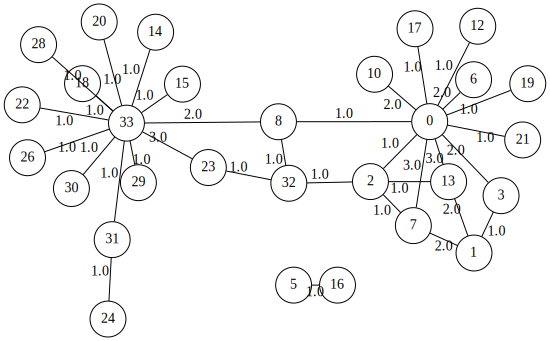

In [7]:
def sandia(A, L):
    return L.mxm(L, mask=L)

print(M.nvals)
S = sandia(M, M.tril())
print(S.nvals)
print(S.reduce_int())
draw(S, directed=False, graph_attr=dict(layout='sfdp'))

In [4]:
%timeit sandia(M, M.triu())

26.3 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
def sandia_dot(A, U, L):
    return L.mxm(U.transpose(), mask=L).reduce_int()

%timeit sandia_dot(M, M.triu(), M.tril())

48.2 µs ± 568 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%timeit sandia_dot(M, M.tril(), M.triu())

48.9 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
